# Lezione 1 - Esercizi

#### Prendiamo dimestichezza con Python dentro al Jupyter Notebook e con le librerie per fare grafici.

Provate a svolgere i seguenti esercizi: <br>
1) [Fattoriale](#section1)<a href='#section1'></a> <br>
2) [Serie di Fibonacci](#section2)<a href='#section2'></a><br>
3) [Esempio di Plot](#section3)<a href='#section3'></a> <br>
4) [Esercizio di Plot di un file root](#section4)<a href='#section4'></a> <br>
5) [Metodo di Eulero](#section5)<a href='#section5'></a> <br>
6) [Fit di curve lineari](#section6)<a href='#section6'></a><br>
7) [Statistica descrittiva](#section7)<a href='#section7'></a>

<a id='section1'></a>
## 1) Fattoriale

Scrivere in Python una funzione fatt che calcola il fattoriale di un numero dato come parametro. <br>
Se siete coraggiosi provate a scriverla ricorsiva!

In [ ]:
def fatt(d):
    """ La funzione calcola il fattoriale del numero d passato come parametro.
    La funzione restituisce -1 in caso di errore.

    >>> fatt(6)
    720
    """

    if type(d) is not int or not d >= 0:
        print("Errore il fattoriale si calcola solo su numeri positivi!")
        return -1

    risultato = 1
    for n in range(1, d + 1):
        risultato *= n

    return risultato


fatt(6)

<a id='section2'></a>
## 2) Serie di Fibonacci

Scrivere una funzione Python che restituisce i primi n numeri della serie di Fibonacci.

In [ ]:
def fibonacci(nterms):
    """ La funzione restituisce una lista con i primi nterms numeri della serie di Fibonacci.

    >>> fib(10)
    [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
    """

    if type(nterms) is not int or not nterms >= 0:
        print("Il parametro deve essere un numero e deve essere maggiore di zero!")
        return None

    # primi due numeri della serie
    n1, n2 = 0, 1

    lista = []
    for count in range(0, nterms):
         lista.append(n1)
         n1, n2 = n2, n1 + n2

    return lista

fibonacci(10)

<a id='section3'></a>
## 3) Esempio di plot

Per fare dei grafici è possibile utilizzare la libreria `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

Proviamo quindi a disegnare delle funzioni, ad esempio funzioni trigonometriche:

In [2]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 5.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

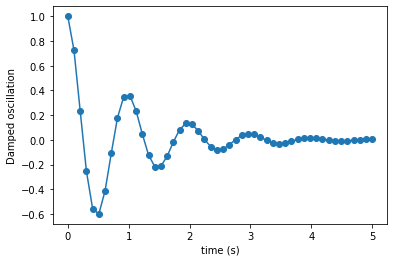

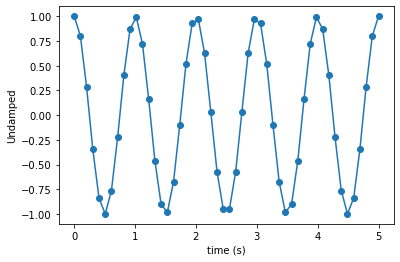

In [3]:
plt.plot(x1, y1, 'o-')
plt.xlabel('time (s)')
plt.ylabel('Damped oscillation')
plt.show()

plt.plot(x2, y2, 'o-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.show()

D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


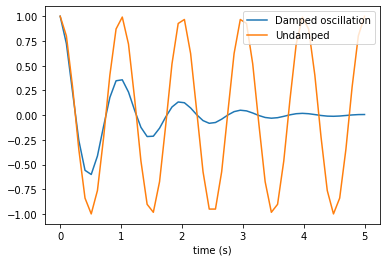

In [5]:
import seaborn as sns
ax = sns.lineplot(x1, y1, label='Damped oscillation')
ax = sns.lineplot(x2, y2, label='Undamped')
ax.set(xlabel='time (s)')
ax.legend(loc='upper right')

<a id='section4'></a>
## 4) Esercizio di Plot di un file root

In questo esercizio utilizzeremo anche una libreria aggiuntiva che si chiama `uproot` e che serve a leggere i files in formato root.

In [6]:
!pip install uproot

In [8]:
!pip install awkward
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

treename = 'HZZ4LeptonsAnalysisReduced'
filename ='data/ntuple_4mu_bkg.root'
VARS = ['f_mass4l', 'f_massjj']

upfile = uproot.open(filename)
params = upfile[treename].arrays(VARS)

df = pd.DataFrame(params.tolist())
print (df)

         f_mass4l     f_massjj
0       91.098129  -999.000000
1      201.847610  -999.000000
2       89.279076  -999.000000
3      586.597412  1353.025513
4      135.589798  -999.000000
...           ...          ...
58102   89.582817  -999.000000
58103  252.845184  -999.000000
58104   90.129845  -999.000000
58105  250.977417  -999.000000
58106  229.470154  -999.000000

[58107 rows x 2 columns]


Proviamo ora a plottare questi dati (facciamo un istogramma, o altre rappresentazioni che doveste trovare utili).

In [10]:
df.describe()

,f_mass4l,f_massjj
count,58107.000000,58107.000000
mean,214.346078,-891.822452
std,123.011837,352.657971
min,70.003792,-999.000000
25%,112.146431,-999.000000
50%,204.004684,-999.000000
75%,259.251389,-999.000000
max,2275.151367,2427.755859


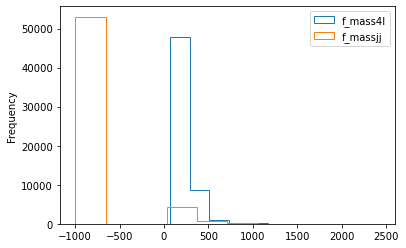

In [9]:
ax = df[VARS[0]].plot.hist(bins=10, label=VARS[0], histtype='step')
ax = df[VARS[1]].plot.hist(bins=10, label=VARS[1], histtype='step')
plt.legend(loc='upper right')

(0.0, 1000.0)

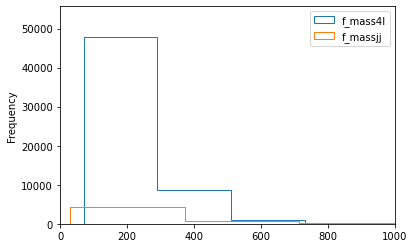

In [11]:
ax = df[VARS[0]].plot.hist(bins=10, label=VARS[0], histtype='step')
ax = df[VARS[1]].plot.hist(bins=10, label=VARS[1], histtype='step')
plt.legend(loc='upper right')

ax.set_xlim(0, 1000)

D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

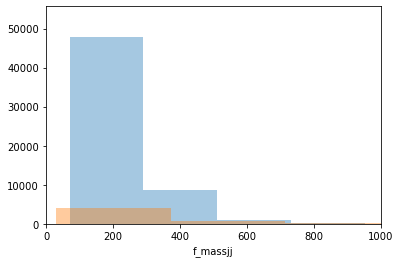

In [12]:
import seaborn as sns
ax = sns.distplot(df[VARS[0]], bins=10, kde=False)
ax = sns.distplot(df[VARS[1]], bins=10, kde=False)

ax.set_xlim(0, 1000)

D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

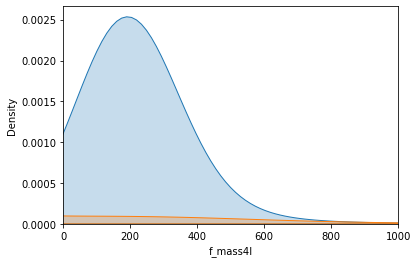

In [14]:
ax = sns.kdeplot(df[VARS[0]], shade=True, bw=1)
ax = sns.kdeplot(df[VARS[1]], shade=True, bw=1)

ax.set_xlim(0, 1000)

<a id='section5'></a>
## 5) Metodo di Eulero

Cominciamo con le equazioni differenziali per la caduta libera:

$$v = \frac{dx}{dt} \qquad a = \frac{dv}{dt}$$

dove $a$ è una costante. Possiamo riorganizzare queste equazioni:

$$dx = v \; dt \qquad dv = a \; dt$$

Ricordati cosa significano $dx$, $dt$ e $dv$: questi sono i cambiamenti infinitesimi di posizione, tempo e velocità. Questa forma delle equazioni suggerisce un possibile modo di approssimare la soluzione alle equazioni differenziali: prendere piccoli passi di tempo $dt$ e calcolare la nuova $x$ e $v$ per ogni fase temporale.

$$x_{new} = x_{old} + v \; dt \qquad v_{new} = v_{old} + a \; dt$$

Questo è chiamato "metodo di Eulero". Dobbiamo compiere piccoli passi per ottenere una buona soluzione, il che significa che dobbiamo compiere molti passi per arrivare ovunque. Ecco a cosa serve il computer: fare tutti quei calcoli noiosi!

Proviamo a scrivere un programma che, dato un oggetto con un'altezza iniziale e una velocità iniziate, descriva il moto di caduta libera di questo oggetto e ne disegni la traiettoria seguita.

D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


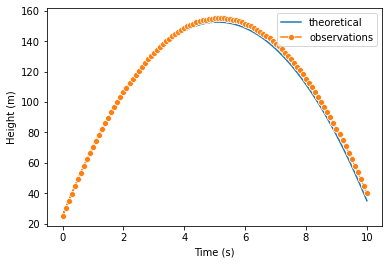

In [15]:
g = 9.8     # We are on Earth.
dt = 0.1    # 1/10 second time step
N = 100     # I'd like to see 100 points in the answer array
vi = 50.0    # initial velocity
xi = 25.0    # initial position

# first, set up variables and almost-empty arrays to hold our answers:
t = 0
x = xi
v = vi
time = [0]       # initial value of time is zero!
height = [xi]    # initial height is xi
velocity = [vi]  # initial velocity is vi
# Note that 't', 'x' and 'v' are the current time, position and velocity, but
# 'time', 'height' and 'velocity' are arrays that will contain all the positions
# and velocities at all values of 'time'.

# Now let's use Euler's method to find the position and velocity.
for j in range(N):
    # here are the calculations:
    t = t + dt
    x = x + v * dt
    v = v - g * dt
    # And here we put those calculations in the arrays to plot later:
    time.append(t)
    height.append(x)
    velocity.append(v)

# Now that the calculations are done, plot the position:
import seaborn as sns

# just for comparison, I'll also plot the known solution!
# and here the computed trajectory
ax = sns.lineplot(time, [xi + vi*t - 0.5*g*t**2 for t in time], label='theoretical')
ax = sns.lineplot(time, height, label='observations', marker="o")

ax.set(xlabel='Time (s)', ylabel='Height (m)')
ax.legend(loc='upper right')

<a id='section6'></a>
## 6) Fit di curve lineare

È spesso il caso nei laboratori di fisica introduttiva (e in Advanced Physics Labs!) Che abbiamo un set di dati e un modello teorico per i dati, e vorremmo trovare i parametri del modello che rendono il modello più adatto al set di dati.

Ad esempio, uno studente del mio laboratorio stava recentemente lavorando a un sensore che avrebbe dovuto tracciare la posizione angolare di un magnete rotante, ma sembrava che il sensore fosse calibrato male. Era difficile dirlo con certezza, tuttavia, poiché il sensore (se funzionava correttamente) riportava la posizione in unità di $\frac{1}{1024}^{ths}$ di una rivoluzione, e non era affatto spento se lo era affatto. Lo spostamento manuale del magnete non era sufficientemente preciso per determinare se l'errore di calibrazione fosse reale e se fosse reale se fosse coerente.

Per indagare ulteriormente sul sistema, ha registrato la posizione del magnete riportata dal sensore ad ogni rotazione, per 10 rotazioni. Poteva solo "osservare" le rotazioni, quindi i suoi dati non erano esatti ma era certamente entro 2 gradi (5,7 unità del sensore) di "zero" ogni volta. I suoi dati sono di seguito.

| turns | position |
|---|---|
|0 | 0 |
|1 | -2 |
|2 | -11 |
|3 | -15 |
|4 | -24 |
|5 | -32 |
|6 | -40 |
|7 | -50 |
|8 | -52 |
|9 | -62 |
|10 | -65 |

Sulla base di questi dati, potremmo dire che il sensore è stato calibrato male o è stato solo un errore casuale? Se è stato calibrato male, di quanto è stato calibrato male? In altre parole, se il sensore doveva emettere 1024 impulsi per rotazione, quanti impulsi stava effettivamente emettendo per rotazione?

Per rispondere a questa domanda, traccia i dati. I punti dati sono sparsi nella media o c'è una tendenza definita? La tendenza è lineare? Se i dati sono lineari, qual è la pendenza? Quanti impulsi per giro generava realmente il sensore?

Metti i dati in due elenchi Python:

``
turns = [0, 1, 2, 3, ... 10]
position = [0, -2, -11, ... -65]
``

La funzione `polyfit()` in python esegue l'adattamento della curva dei polinomi, inclusi i polinomi del primo ordine (lineari).

I parametri della retta di fit sono: [-7.03636364  3.09090909]


D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


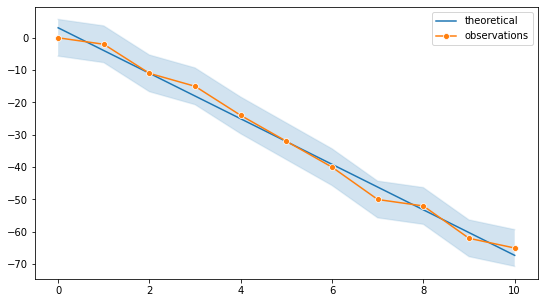

In [16]:
import seaborn as sns
import numpy as np

turns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
position = [0, -2, -11, -15, -24, -32, -40, -50, -52, -62, -65]

fit = np.polyfit(turns, position, 1)
print("I parametri della retta di fit sono: %s" % fit)

fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(turns, [fit[1] + fit[0] * t for t in turns], label='theoretical')
sns.lineplot(turns, position, label='observations', marker="o")

lower = [p - 5.7 for p in position]
upper = [p + 5.7 for p in position]

ax.plot(turns, lower, color='tab:blue', alpha=0.1)
ax.plot(turns, upper, color='tab:blue', alpha=0.1)
ax.fill_between(turns, lower, upper, alpha=0.2)

ax.legend(loc='upper right')

<a id='section7'></a>
## Statistica descrittiva

Calcola le misure di tedenza e viaribility del seguente dataset <a href='https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston' > riguardante i prezzi delle case di Boston</a>:

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>